Список былых империй:
https://en.wikipedia.org/wiki/Category:Former_empires

Требуется написать два скрипта на языке Python. Первый обрабатывает указанную html-страницу и записывает список ссылок на страницы с названием в файл. В список попадают ссылки только на те страницы, на которых в информационной плашке есть поля

«Proceded by» или «Succeeded by» (например, Roman Empire). Второй скрипт выводит названия империй и просит пользователя выбрать одну из них. После этого по заданной странице строится ориентированный граф: вершинами являются страны, причём страна A и страна Б соединяются ребром, если у страны А в информационной плашке страна Б указана в списке «Succeeded by» или у страны Б страна А числится в списке «Proceeded by». Потом процедура рекурсивно повторяется для всех стран, указанных в этих списках.

In [1]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt


def get_links_from_wikipedia_category(url):
    # Отправляем GET-запрос для загрузки HTML-страницы
    response = requests.get(url)
    
    # Проверяем успешность запроса
    if response.status_code == 200:
        # Используем BeautifulSoup для парсинга HTML
        soup = BeautifulSoup(response.content, 'html.parser')
        start_parsing = 0
        links_dict = {}
        end_string = '<div class="printfooter"'
        for element in soup.find_all():
            #print('--- ', str(link)[0:200])
            if  '<h3>A</h3>' == str(element):
                start_parsing = 1
            if end_string == str(element)[0:len(end_string)]:
                start_parsing = 0
            if start_parsing:
                if (element.get('href') != None):
                    url = "https://en.wikipedia.org" + element.get('href')
                    response = requests.get(url)
                    if response.status_code == 200:
                        # Используем BeautifulSoup для парсинга HTML
                        soup1 = BeautifulSoup(response.content, 'html.parser')
                        if soup1.findAll(text="Preceded by") or soup1.findAll(text="Succeeded by"):
                            links_dict[element.text] = element.get('href')
                            print('---------', element.text, '\twas preceded or succeeded')
                        #else: 
                        #    print(element.text, '\twas NOT pr. or suc.')
                    else: 
                        links_dict[element.text] = 'unk'
        return links_dict
    else:
        # Если запрос не был успешным, выводим сообщение об ошибке
        print("Ошибка при загрузке страницы:", response.status_code)
        return []

# URL страницы с категорией на Wikipedia
url = "https://en.wikipedia.org/wiki/Category:Former_empires"
# Получаем список ссылок на странице
links = get_links_from_wikipedia_category(url)
# Выводим список ссылок
for link in links:
    print(link, links[link])


200
Abbasid Caliphate /wiki/Abbasid_Caliphate
Achaemenid Empire /wiki/Achaemenid_Empire
Ajuran Sultanate /wiki/Ajuran_Sultanate
Akkadian Empire /wiki/Akkadian_Empire
Ancient Carthage /wiki/Ancient_Carthage
Kingdom of Armenia (antiquity) /wiki/Kingdom_of_Armenia_(antiquity)
Ashanti Empire /wiki/Ashanti_Empire
Assyria /wiki/Assyria
Austria-Hungary /wiki/Austria-Hungary
Austrian Empire /wiki/Austrian_Empire
Babylonia /wiki/Babylonia
Bamana Empire /wiki/Bamana_Empire
Bengal Sultanate /wiki/Bengal_Sultanate
Byzantine Empire /wiki/Byzantine_Empire
Carolingian Empire /wiki/Carolingian_Empire
Western Chalukya Empire /wiki/Western_Chalukya_Empire
Empire of China (1915–1916) /wiki/Empire_of_China_(1915%E2%80%931916)
Crown of Aragon /wiki/Crown_of_Aragon
Dzungar Khanate /wiki/Dzungar_Khanate
Eastern Turkic Khaganate /wiki/Eastern_Turkic_Khaganate
Empire of Kitara /wiki/Empire_of_Kitara
Ethiopian Empire /wiki/Ethiopian_Empire
First Bulgarian Empire /wiki/First_Bulgarian_Empire
First Empire of Hait

In [32]:
import re

def get_links_from_wikipedia_category_re(html_content):
    empires_dict = {}
    # Составляем регулярное выражение для поиска слов между тегами
    pattern = f"<li>(.*?)</li>"
    # Находим все вхождения по регулярному выражению
    matches = re.findall(pattern, html_content, re.DOTALL)
    # Формируем список слов из найденных вхождений
    pattern_words = r'"([^"]+)"'
    for match in matches:
        # Находим все вхождения по регулярному выражению
        matches_words = re.findall(pattern_words, match)
        flag = 1
        if len(matches_words)!=2:
            flag = 0
        else:
            for w in matches_words:
                if 'List' in w or 'Categor' in w or 'button' in w:
                    flag = 0
                    break
        if flag:
            url1 = 'https://en.wikipedia.org' + matches_words[0]
            html_content =requests.get(url1).text 
            if re.findall('Preceded by', html_content, re.DOTALL) and re.findall('Succeeded by', html_content, re.DOTALL):
                empires_dict[matches_words[1]] = matches_words[0]
                print(matches_words[1], matches_words[0])
    return empires_dict

url = 'https://en.wikipedia.org/wiki/Category:Former_empires'
# Пример использования функции
html_content = requests.get(url).text 
found_empires = get_links_from_wikipedia_category_re(html_content)

    # Выводим результат
print("Найденные империи:", found_empires)


Abbasid Caliphate /wiki/Abbasid_Caliphate
Achaemenid Empire /wiki/Achaemenid_Empire
Ajuran Sultanate /wiki/Ajuran_Sultanate
Akkadian Empire /wiki/Akkadian_Empire
Ancient Carthage /wiki/Ancient_Carthage
Kingdom of Armenia (antiquity) /wiki/Kingdom_of_Armenia_(antiquity)
Ashanti Empire /wiki/Ashanti_Empire
Assyria /wiki/Assyria
Austria-Hungary /wiki/Austria-Hungary
Austrian Empire /wiki/Austrian_Empire
Babylonia /wiki/Babylonia
Bamana Empire /wiki/Bamana_Empire
Bengal Sultanate /wiki/Bengal_Sultanate
Byzantine Empire /wiki/Byzantine_Empire
Carolingian Empire /wiki/Carolingian_Empire
Western Chalukya Empire /wiki/Western_Chalukya_Empire
Empire of China (1915–1916) /wiki/Empire_of_China_(1915%E2%80%931916)
Crown of Aragon /wiki/Crown_of_Aragon
Dzungar Khanate /wiki/Dzungar_Khanate
Eastern Turkic Khaganate /wiki/Eastern_Turkic_Khaganate
Ethiopian Empire /wiki/Ethiopian_Empire
First Bulgarian Empire /wiki/First_Bulgarian_Empire
First Empire of Haiti /wiki/First_Empire_of_Haiti
First French E

In [57]:

def get_preceded_by_and_succeeded_by_countries_re(url):
    html_content = requests.get(url).text
    empires_succ = []
    empires_prec = []
    empires_url = {}
    pattern_words = r'"([^"]+)"'
    # Составляем регулярное выражение для поиска слов между тегами
    pattern_words2 = f"<td(.*?)/td>"
    pattern = f"<tbody>(.*?)</tbody>"
    matches = re.findall(pattern, html_content, re.DOTALL)
    # Формируем список слов из найденных вхождений
    for match in matches:
        #print(match,'\n---------\n')
        if '<td style="border:0; padding:0; vertical-align:middle; text-align:right;">' in match:
            matches_words = re.findall(pattern_words, match)
            #print(match, matches_words)
            empires_succ.append(matches_words[2])
            empires_url[matches_words[2]] = 'https://en.wikipedia.org' + matches_words[1]
        elif 'Preceded by'in match:
            matches_words = re.findall(pattern_words2, html_content, re.DOTALL)
            for m in matches_words:
                if 'style="border:0; padding:0; vertical-align:middle; text-align:left;"' in m:
                    matches_words = re.findall(pattern_words, m)
                    #print(match, matches_words)
                    empires_prec.append(matches_words[2])
                    empires_url[matches_words[2]] = 'https://en.wikipedia.org' + matches_words[1]
                    
    return(empires_prec, empires_succ, empires_url)

def get_preceded_by_and_succeeded_by_countries(url):
    # URL страницы Википедии о Римской империи
    
    # Загрузка HTML-кода страницы
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    if not (soup.findAll(text="Preceded by") or soup.findAll(text="Succeeded by")):
        return [], [], {}
    # Находим таблицу, содержащую информацию о Preceded by и Succeeded by
    table = soup.find("table").find("table")
    if table == None:
        table = soup.find("table")
        if table == None:
            print(url)
            return [], [], {}
    countries_dict = {}
    # Инициализация списка для хранения стран
    countries_prec = []
    countries_succ = []
    get_prec = 0
    get_succ = 0
    start_recording = 0
    # Поиск строк таблицы, содержащих информацию о Preceded by и Succeeded by
    for row in table.find_all("td"): 
        if "Preceded by" in row.text:
            get_prec = 1
        if "Succeeded by" in row.text:
            get_succ = 1
        if row.find_all("tbody"):
            link = row.find_all("a")
            for s in link:
                #print(s)
                countries_dict[s.get('title')] = "https://en.wikipedia.org" + s.get('href')
                if get_prec == 1:
                    countries_prec.append(s.get('title'))
                else:
                    countries_succ.append(s.get('title'))
            if get_prec == 1:
                get_prec = 2
    return countries_prec, countries_succ, countries_dict


def make_TGF_file(start_empire ='Eastern Xia', \
                  url = "https://en.wikipedia.org/wiki/Eastern_Xia", re = 1):
    dict_countries = {0: start_empire}
    dict_connections = []  # '1 2' means 2nd country is preceded by 1st
    country_check = [1]    # 1 if the n-th country is checked
    num_countries = 1      # total number of countries
    url_dict = {}          # 'country_name': 'country_url'

    if re:
        c1, c2, url_dict = get_preceded_by_and_succeeded_by_countries_re(url)
    else:
        c1, c2, url_dict = get_preceded_by_and_succeeded_by_countries(url)
    for c in c1:
        tmp_str = str(num_countries) + ' 0\n'
        if tmp_str not in dict_connections:
            dict_connections.append(tmp_str)
        if c not in dict_countries.values():
            dict_countries[num_countries] = c
            country_check.append(0)
            num_countries += 1
    for c in c2:
        tmp_str = '0 ' + str(num_countries)+ '\n'
        if tmp_str not in dict_connections:
            dict_connections.append(tmp_str)
        if c not in dict_countries.values():
            dict_countries[num_countries] = c
            country_check.append(0)
            num_countries += 1
    print('!!!!!!!!!\n', dict_countries, dict_connections, '!!!!!!!!!\n')
    while 0 in country_check:
        i = 0 
        while country_check[i]:
            i+=1
        cur_country = dict_countries[i]
        cur_url = url_dict[cur_country]
        print(i, cur_url)
        c1, c2, dict_new = get_preceded_by_and_succeeded_by_countries(cur_url)
        url_dict = {**url_dict, **dict_new}
        for c in c1:
            tmp_str = str(num_countries) + ' ' + str(i) + '\n'
            if tmp_str not in dict_connections:
                dict_connections.append(tmp_str)
            if c not in dict_countries.values():
                dict_countries[num_countries] = c
                country_check.append(0)
                num_countries += 1
        for c in c2:
            tmp_str = str(i) + ' ' + str(num_countries) + '\n'
            if tmp_str not in dict_connections:
                dict_connections.append(tmp_str)
            if c not in dict_countries.values():
                dict_countries[num_countries] = c
                country_check.append(0)
                num_countries += 1
        country_check[i] = 1
        if (i == 50):
            break
    my_str = ''
    for d in dict_countries:
        my_str += str(d) + ' ' + dict_countries[d] + '\n'
    with open("TGF_empires", "w") as text_file:
        text_file.write(my_str + ' '.join(dict_connections))
    return dict_countries, dict_connections

In [66]:
import random
el_list = list(found_empires.keys())
start_emp = random.choice(el_list)
url = 'https://en.wikipedia.org' + found_empires[start_emp]
print(start_emp, url)

#start_empire ='Ethiopian Empire'
#url = "https://en.wikipedia.org/wiki/Ethiopian_Empire"
#start_emp ='Mamluk Sultanate'
#url = "https://en.wikipedia.org/wiki/Mamluk_Sultanate"

dict_countries, dict_connections = make_TGF_file(start_empire=start_emp, url=url)
dict_countries, dict_connections

!!!!!!!!!
 {0: 'Mamluk Sultanate', 1: 'Abbasid Caliphate', 2: 'Ayyubid dynasty', 3: 'Kingdom of Jerusalem', 4: 'Principality of Antioch', 5: 'County of Tripoli', 6: 'Makuria', 7: 'Armenian Kingdom of Cilicia', 8: 'Tahirids (Yemen)', 9: 'Ottoman Empire'} ['1 0\n', '2 0\n', '3 0\n', '4 0\n', '5 0\n', '6 0\n', '7 0\n', '8 0\n', '0 9\n'] !!!!!!!!!

1 https://en.wikipedia.org/wiki/Abbasid_Caliphate
2 https://en.wikipedia.org/wiki/Ayyubid_dynasty
3 https://en.wikipedia.org/wiki/Kingdom_of_Jerusalem
4 https://en.wikipedia.org/wiki/Principality_of_Antioch
5 https://en.wikipedia.org/wiki/County_of_Tripoli
6 https://en.wikipedia.org/wiki/Makuria
7 https://en.wikipedia.org/wiki/Armenian_Kingdom_of_Cilicia
8 https://en.wikipedia.org/wiki/Tahirids_(Yemen)
9 https://en.wikipedia.org/wiki/Ottoman_Empire
10 https://en.wikipedia.org/wiki/Umayyad_Caliphate
11 https://en.wikipedia.org/wiki/Dabuyid_dynasty
12 https://en.wikipedia.org/wiki/Ottoman_Caliphate
13 https://en.wikipedia.org/wiki/Mongol_Empire
14

({0: 'Mamluk Sultanate',
  1: 'Abbasid Caliphate',
  2: 'Ayyubid dynasty',
  3: 'Kingdom of Jerusalem',
  4: 'Principality of Antioch',
  5: 'County of Tripoli',
  6: 'Makuria',
  7: 'Armenian Kingdom of Cilicia',
  8: 'Tahirids (Yemen)',
  9: 'Ottoman Empire',
  10: 'Umayyad Caliphate',
  11: 'Dabuyid dynasty',
  12: 'Ottoman Caliphate',
  13: 'Mongol Empire',
  14: 'Emirate of Córdoba',
  15: 'Idrisid dynasty',
  16: 'Ziyarid dynasty',
  17: 'Sajid dynasty',
  18: 'Saffarid dynasty',
  19: 'Buyid dynasty',
  20: 'Fatimid Caliphate',
  21: 'Zengid dynasty',
  22: 'Zurayids',
  23: 'Kingdom of Georgia',
  24: 'Shah-Armens',
  25: 'Artuqids',
  26: 'Rasulid dynasty',
  27: 'Emirate of Hasankeyf',
  28: 'Principality of Donboli',
  29: 'Emirate of Şirvan',
  30: 'Emirate of Kilis',
  31: 'Emirate of Bingöl',
  32: 'Jund Filastin',
  33: 'Jund al-Urdunn',
  34: 'Seljuk Empire',
  35: 'Sultanate of Rum',
  36: 'Kingdom of Kush',
  37: 'Banu Kanz',
  38: 'Funj Sultanate',
  39: 'Egypt Eyale

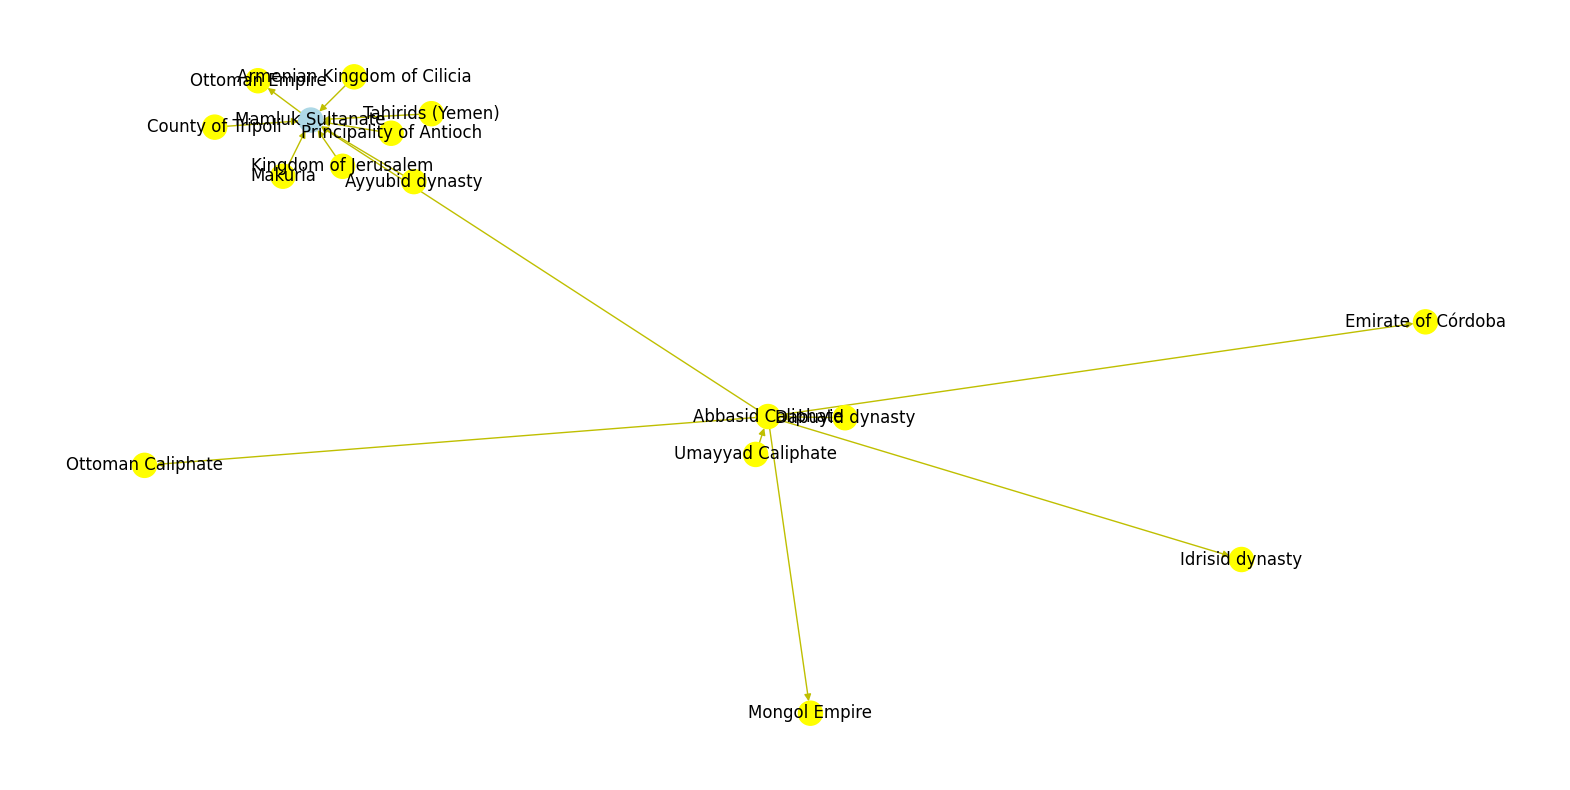

In [67]:
f, ax = plt.subplots(figsize=(20, 10))
G=nx.DiGraph(directed=True)
color_map = []
for d in dict_countries:
    G.add_node(dict_countries[d])
    if dict_countries[d] == start_emp:
        color_map.append('lightblue')
    else: 
        color_map.append('yellow')
    if len(G.nodes()) > 15:
        break
for con in dict_connections:
    con = con.replace('\n', '').split(' ')
    if int(con[0]) in dict_countries.keys() and int(con[1]) in dict_countries.keys():
        if dict_countries[int(con[0])] in G.nodes() and dict_countries[int(con[1])] in G.nodes():
            G.add_edge(dict_countries[int(con[0])], dict_countries[int(con[1])] )
                
    #my_str += str(d) + ' ' + dict_countries[d] + '\n'

nx.draw(G, with_labels = True, node_color = color_map, edge_color = 'y')

In [68]:
dict_countries, dict_connections

({0: 'Mamluk Sultanate',
  1: 'Abbasid Caliphate',
  2: 'Ayyubid dynasty',
  3: 'Kingdom of Jerusalem',
  4: 'Principality of Antioch',
  5: 'County of Tripoli',
  6: 'Makuria',
  7: 'Armenian Kingdom of Cilicia',
  8: 'Tahirids (Yemen)',
  9: 'Ottoman Empire',
  10: 'Umayyad Caliphate',
  11: 'Dabuyid dynasty',
  12: 'Ottoman Caliphate',
  13: 'Mongol Empire',
  14: 'Emirate of Córdoba',
  15: 'Idrisid dynasty',
  16: 'Ziyarid dynasty',
  17: 'Sajid dynasty',
  18: 'Saffarid dynasty',
  19: 'Buyid dynasty',
  20: 'Fatimid Caliphate',
  21: 'Zengid dynasty',
  22: 'Zurayids',
  23: 'Kingdom of Georgia',
  24: 'Shah-Armens',
  25: 'Artuqids',
  26: 'Rasulid dynasty',
  27: 'Emirate of Hasankeyf',
  28: 'Principality of Donboli',
  29: 'Emirate of Şirvan',
  30: 'Emirate of Kilis',
  31: 'Emirate of Bingöl',
  32: 'Jund Filastin',
  33: 'Jund al-Urdunn',
  34: 'Seljuk Empire',
  35: 'Sultanate of Rum',
  36: 'Kingdom of Kush',
  37: 'Banu Kanz',
  38: 'Funj Sultanate',
  39: 'Egypt Eyale